# Classification. Linear models and KNN

In [24]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Part 1: Titanic survival prediction

### Dataset

Read the description here: https://www.kaggle.com/c/titanic/data. Download the dataset and place it in the *data/titanic/* folder in your working directory.
You will use train.csv for model training and validation. The test set is used for model testing: once the model is trained, you can predict whether a passenger survived or not for each passenger in the test set, and submit the predictions: https://www.kaggle.com/c/titanic/overview/evaluation.  


In [5]:
PATH = "./data/"

In [4]:
data = pd.read_csv(os.path.join(PATH, 'titanic', 'train.csv')).set_index('PassengerId')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

**(0.5 points)** How many females and males are there in the dataset? What about the survived passengers? Is there any relationship between the gender and the survival?

 male_counts =  577 
 female_counts =  314
 Survived_male =  109 
 Survived_female =  233


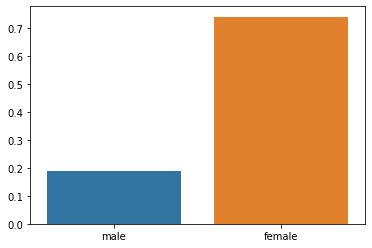

In [6]:
## your code
from sklearn.linear_model import LogisticRegression

male_counts=data[(data.Sex=='male')].shape[0]
female_counts=data[(data.Sex=='female')].shape[0]
Survived_male, Survived_female=data[(data.Survived==1)&(data.Sex=='male')].shape[0],data[(data.Survived==1)&(data.Sex=='female')].shape[0]
print(" male_counts = ", male_counts,"\n","female_counts = ", female_counts)
print(" Survived_male = ", Survived_male,"\n",  "Survived_female = ", Survived_female)
sns.barplot(x="Sex", y="Survived", data={'Sex' : ['male','female'], 'Survived': [(Survived_male/male_counts), (Survived_female/female_counts)]})
plt.show()



In [33]:
data.info()
Pclaas_counts=data[(data.Sex=='male')]['Pclass'].value_counts()
Pclaas_counts_sur=data[(data.Sex=='male')&(data.Survived==1)]['Pclass'].value_counts()
print(Pclaas_counts_sur/Pclaas_counts)
Embarked_counts=data[(data.Sex=='male')]['Embarked'].value_counts()
Embarked_counts_sur=data[(data.Sex=='male')&(data.Survived==1)]['Embarked'].value_counts()
print("\n", Embarked_counts_sur/Embarked_counts)
Parch_counts=data[(data.Sex=='male')]['Parch'].value_counts()
Parch_counts_sur=data[(data.Sex=='male')&(data.Survived==1)]['Parch'].value_counts()
print("\n", Parch_counts_sur/Parch_counts)
SibSp_counts=data[(data.Sex=='male')]['SibSp'].value_counts()
SibSp_counts_sur=data[(data.Sex=='male')&(data.Survived==1)]['SibSp'].value_counts()
print("\n", SibSp_counts_sur/SibSp_counts)
List_men=['Pclass','Embarked','Parch','SibSp','SibSp']


#female_counts=data[(data.Sex=='female')].shape[0]
#Survived_male, Survived_female=data[(data.Survived==1)&(data.Sex=='male')].shape[0],data[(data.Survived==1)&(data.Sex=='female')].shape[0]
#print(" male_counts = ", male_counts,"\n","female_counts = ", female_counts)
#print(" Survived_male = ", Survived_male,"\n",  "Survived_female = ", Survived_female)
#sns.barplot(x="Sex", y="Survived", data={'Sex' : ['male','female'], 'Survived': [(Survived_male/male_counts), (Survived_female/female_counts)]})
#plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           714 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Embarked      889 non-null    object 
 11  Sex_int       891 non-null    int64  
 12  Embarked_int  889 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 137.5+ KB
3    0.135447
1    0.368852
2    0.157407
Name: Pclass, dtype: float64

 S    0.174603
C    0.305263
Q    0.073171
Name: Embarked, dtype: float64

 0    0.165289
1    0.327586
2    0.322

There is relationship between the gender and the survival. 

**(0.5 points)** Plot age distribution of the passengers. What is the average and the median age of survived and deceased passengers? Do age distributions differ for survived and deceased passengers? Why?

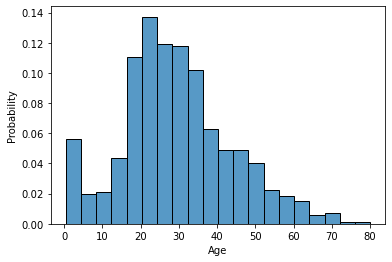

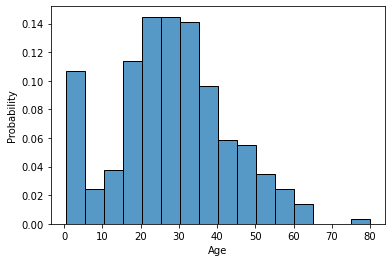

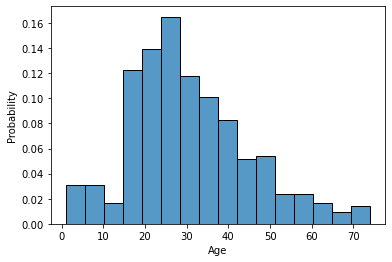

28.343689655172415 28.0
30.62617924528302 28.0


In [7]:
## your code
data['Age'].value_counts()
#Plot age distribution of the passengers.
sns.histplot(data['Age'], stat='probability')
plt.show()

sns.histplot(data[(data.Survived==1)]['Age'], stat='probability')
plt.show()

sns.histplot(data[(data.Survived==0)]['Age'], stat='probability')
plt.show()

sur_mean,sur_median=data[(data.Survived==1)]['Age'].mean(),data[(data.Survived==1)]['Age'].median()
dec_mean,dec_median=data[(data.Survived==0)]['Age'].mean(),data[(data.Survived==0)]['Age'].median()

print(sur_mean,sur_median)
print(dec_mean,dec_median)

Age distributions are not very differ for survived and deceased passengers. There is small relationship between the Age and the survival

**(1 point)** Explore "passenger class" and "embarked" features. What class was "the safest"? Is there any relationship between the embarkation port and the survival? Provide the corresponding visualizations.

Embarked   C   Q   S
Pclass              
1         59   1  74
2          9   2  76
3         25  27  67
Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


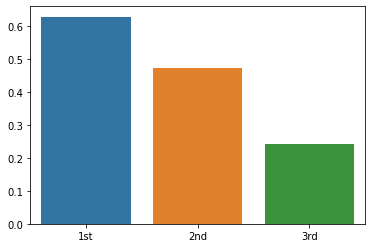

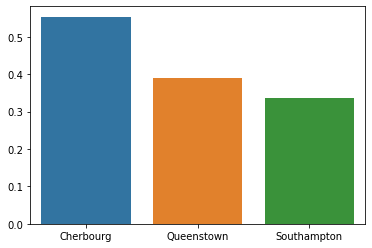

In [8]:
## your code
dPE_Sur=pd.crosstab(data[(data.Survived==1)]['Pclass'], data['Embarked'], normalize=False)
dPE=pd.crosstab(data['Pclass'], data['Embarked'], normalize=False)
print(dPE_Sur)
print(dPE)

Survived_1cl=data[(data.Survived==1)&(data.Pclass==1)].shape[0]
Survived_2cl=data[(data.Survived==1)&(data.Pclass==2)].shape[0]
Survived_3cl=data[(data.Survived==1)&(data.Pclass==3)].shape[0]
All_1cl=data[(data.Pclass==1)].shape[0]
All_2cl=data[(data.Pclass==2)].shape[0]
All_3cl=data[(data.Pclass==3)].shape[0]

sns.barplot(x="Pclass", y="Survived", data={'Pclass' : ['1st','2nd','3rd'], 'Survived': [(Survived_1cl/All_1cl), (Survived_2cl/All_2cl),(Survived_3cl/All_3cl)]})

plt.show()

Survived_C=data[(data.Survived==1)&(data.Embarked=='C')].shape[0]
Survived_Q=data[(data.Survived==1)&(data.Embarked=='Q')].shape[0]
Survived_S=data[(data.Survived==1)&(data.Embarked=='S')].shape[0]
All_C=data[(data.Embarked=='C')].shape[0]
All_Q=data[(data.Embarked=='Q')].shape[0]
All_S=data[(data.Embarked=='S')].shape[0]

sns.barplot(x="Embarked", y="Survived", data={'Embarked' : ['Cherbourg','Queenstown','Southampton'], 'Survived': [(Survived_C/All_C), (Survived_Q/All_Q),(Survived_S/All_S)]})
plt.show()




Согласно полученным, данным можно сделать вывод, что те кто приобрели билет на 1 класс и сели Cherbourg имели больший шанс выжить.


### Modelling

**(0.5 points)** Find the percentage of missing values for each feature. 

In [9]:
## your code
a=(data.isna().sum()/data.shape[0])*100
print(a)


Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64


Think about the ways to handle these missing values for modelling and write your answer below. Which methods would you suggest? What are their advantages and disadvantages?

Значение Age и Embarked считаю лучше заполнить средним значением по выборке, а столбец с номерами кабин исключить из выборки так как количество пропусков сильно велико.

**(1.5 points)** Prepare the features and train two models (KNN and Logistic Regression) to predict the survival. Compare the results. Use accuracy as a metric. Don't forget about cross-validation!

In [10]:
y = data['Survived']

In [11]:
#d = 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, RFECV, SequentialFeatureSelector
from sklearn.model_selection import KFold, cross_val_score

data['Sex_int'] = data['Sex'].map({'male' : 1, 'female' : 0})
data['Embarked_int'] = data['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})
List=['Pclass', 'Sex_int', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_int']
List_2=['Pclass', 'Sex_int', 'Age']
List_3=['Pclass', 'Sex_int']
my_model = LogisticRegression(solver='liblinear', penalty='l1')
my_model_2 = LogisticRegression(solver='liblinear', penalty='l1')
data_X=data[List].fillna(value=data[List].mean())
data_X2=data[List_2].fillna(value=data[List_2].mean())
data_X3=data[List_3].fillna(value=data[List_3].mean())
my_model.fit(X=data_X, y=y)
results_2 = cross_validate(my_model,data_X, y, cv=5,return_train_score=True,return_estimator=True)
print(results_2['test_score'])
model_X2=results_2['estimator'][4]

data.Survived.value_counts()

k_means_model = KNeighborsClassifier(n_neighbors=11)
#k_means_model.fit(X=data_X, y=y);
KNN_mod=cross_validate(k_means_model,data_X, y, cv=10,return_train_score=True,return_estimator=True)
print("KNN : ", KNN_mod['test_score'])

selection_model = RandomForestClassifier(random_state=42)
pipe_selection = make_pipeline(StandardScaler(), SelectFromModel(selection_model), my_model)
results=cross_validate(pipe_selection, data_X, y, scoring='accuracy', cv=5, return_estimator=True)

#print(results['estimator'])
print(results['test_score'])
model_X=results['estimator'][1]

## your code
pipe_selection_2 = make_pipeline(StandardScaler(), SelectFromModel(selection_model), my_model_2)
results_test=cross_validate(pipe_selection, data_X2, y, scoring='recall', cv=10, return_estimator=True)
print(results_test['test_score'])
model_X3=results_test['estimator'][3]


results_0 = cross_validate(my_model,data_X3, y, cv=3,scoring='accuracy', return_train_score=True,return_estimator=True)
print("result_0", results_0['test_score'])

[0.78212291 0.78651685 0.78089888 0.76404494 0.8258427 ]
KNN :  [0.62222222 0.64044944 0.61797753 0.74157303 0.69662921 0.70786517
 0.7752809  0.73033708 0.75280899 0.74157303]
[0.79329609 0.80898876 0.76404494 0.75280899 0.79213483]
[0.74285714 0.73529412 0.61764706 0.82352941 0.76470588 0.61764706
 0.61764706 0.55882353 0.67647059 0.65714286]
result_0 [0.78787879 0.8013468  0.77104377]


**(0.5 + X points)** Try more feature engineering and hyperparameter tuning to improve the results. You may use either KNN or Logistic Regression (or both).

In [66]:
## your code
data_test = pd.read_csv(os.path.join(PATH, 'titanic', 'test.csv'))
data_test['Sex_int'] = data_test['Sex'].map({'male' : 1, 'female' : 0})
data_test['Embarked_int'] = data_test['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})
Y_test = pd.read_csv(os.path.join(PATH, 'titanic', 'gender_submission.csv')).set_index('PassengerId')
#print(Y_test.shape[0])
data_test_X=data_test[List].fillna(value=data_test[List].mean())
predictions=my_model.predict(data_test_X[List])

output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
print(my_model.score(data_test_X[List],Y_test))
print(KNN_mod['estimator'][3].score(data_test_X[List],Y_test))
print(model_X.score(data_test_X[List],Y_test))
print(model_X2.score(data_test_X[List],Y_test))
data_test_X3=data_test[List_2].fillna(value=data_test[List_2].mean())
print(model_X3.score(data_test_X3[List_2],Y_test))

predictions_Final=model_X.predict(data_test_X[List])
predictions_Final_2=model_X2.predict(data_test_X[List])
predictions_Final_3=model_X3.predict(data_test_X3[List_2])
predictions_Final_0=results_0['estimator'][1].predict(data_test_X[List_3])

output_1 = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions_Final})
output_1.to_csv('my_submission_Final.csv', index=False)
print("Your submission was successfully saved!")

output_2 = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions_Final_2})
output_2.to_csv('my_submission_Final_2.csv', index=False)
print("Your submission was successfully saved!")

output_3 = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions_Final_3})
output_3.to_csv('my_submission_Final_3.csv', index=False)
print("Your submission was successfully saved!")
output_0 = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions_Final_0})
output_0.to_csv('my_submission_Final_0.csv', index=False)

Your submission was successfully saved!
0.645933014354067
0.638755980861244
0.9856459330143541
0.9497607655502392
1.0
Your submission was successfully saved!
Your submission was successfully saved!
Your submission was successfully saved!


оценка на kaggle 0.76555

Load the test set and make the predictions. Submit them to kaggle and see the results :)
Select the best model, load the test set and make the predictions. Submit them to kaggle.

**Note**. X points will depend on your kaggle leaderboard score.
$$ f(score) = 0.5, \ \ 0.76 \leq score < 0.78,$$
$$ f(score) = 1.0, \ \ 0.78 \leq score < 0.81,$$ 
$$ f(score) = 2.5, \ \ 0.81 \leq score $$ 
Your code should generate the output submitted to kaggle. Fix random seeds to make the results reproducible.

In [13]:
## your code
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
#from sklearn.feature_selection import SelectFromModel
#selection_model = RandomForestClassifier(random_state=42)
#selector = SelectFromModel(selection_model).fit(data_X, y)
#cancer_data_pruned = selector.transform(data_X)
#print(cancer_data_pruned)
scaler_1 = StandardScaler()
data_X_SC=scaler_1.fit_transform(data_X)
data_test_X_SC=scaler_1.fit_transform(data_test_X[List])
my_model.fit(X=data_X_SC, y=y)
print(my_model.score(data_test_X_SC,Y_test))
predictions=my_model.predict(data_test_X_SC)
output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission_2.csv', index=False)
print("Your submission was successfully saved!")
accuracy_score(y_true=Y_test, y_pred=predictions)


0.937799043062201
Your submission was successfully saved!


0.937799043062201

In [85]:

List_men=['Pclass','Embarked_int','Parch','SibSp','SibSp','Survived']
List_X=['Pclass','Embarked_int','Parch','SibSp','SibSp']
data_men=data[(data.Sex=='male')][List_men]
data_women=data[(data.Sex=='female')][List_men]
#print(data_men.head())
#print(data_men.shape[0],data_women.shape[0])
data_men.dropna()

#print(data_men.shape[0],data_women.shape[0])
y_men = data_men['Survived']


model_men = LogisticRegression(solver='liblinear', penalty='l1')
#model_women = LogisticRegression(solver='liblinear', penalty='l1')
model_men.fit(X=data_men[List_X], y=y_men)
#res_men = cross_validate(model_men,data_men[List_X], y_men, cv=5,return_train_score=True,return_estimator=True)
data_test_m=data_test[data_test.Sex=='male']
data_test_w=data_test[data_test.Sex=='female']

data_men_test=data_test_m[List_X].fillna(value=data_test_m[List_X].mean())
data_women_test=data_test_w[List_3].fillna(value=data_test_w[List_3].mean())
predictions_men=model_men.predict(data_men_test[List_X])
print(data_women_test[List_3])
out_m=results_0['estimator'][1].predict(data_women_test[List_3])
print(out_m)
output_men = pd.DataFrame({'PassengerId': data_test_m.PassengerId, 'Survived': predictions_men})
output_women=pd.DataFrame({'PassengerId': data_test_w.PassengerId, 'Survived': out_m})
print(output_women)
print(output_women.shape[0],output_men.shape[0],data_test.shape[0])
output_mw=output_women.append(output_men)
print(output_mw)
output_mw=output_mw.sort_values(by='PassengerId')
output_mw.to_csv('my_submission_new.csv', index=False)


     Pclass  Sex_int
1         3        0
4         3        0
6         3        0
8         3        0
12        1        0
..      ...      ...
409       3        0
410       3        0
411       1        0
412       3        0
414       1        0

[152 rows x 2 columns]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
     PassengerId  Survived
1            893         1
4            896         1
6            898         1
8            900         1
12           904         1
..           ...       ...
409         1301         1
410         1302         1
411         1303         1
412         1304         1
414         1306         1

[152 rows x 2 columns]
152 266 418
     PassengerId  Survived
1            893         1


d:\Users\ustes\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
d:\Users\ustes\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


## Part 2: Porto Seguro’s Safe Driver Prediction

Let's build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year.
Read the detailed description and download the dataset https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data. Put the data into *./data/porto/*.

In [26]:
insurance_data = pd.read_csv(os.path.join(PATH, 'porto', 'train.csv')).set_index('id')

In [27]:
insurance_data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


Let's skip EDA for now. We'll use SGDClassifier and build a simple baseline: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html.
Note that loss='log' gives logistic regression.

In [28]:
y = insurance_data['target']
X = insurance_data.drop(columns=['target'])

In [29]:
numeric_features = [column for column in X if not (column.endswith("cat") or column.endswith("bin"))]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = [column for column in X if (column.endswith("cat") or column.endswith("bin"))]
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SGDClassifier(loss='log', alpha=0.001, n_jobs=-1, random_state=14))])

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
clf = pipeline.fit(X_train, y_train)

In [22]:
#

We'll calculate the model accuracy:

In [32]:
accuracy_score(y_true=y_valid, y_pred=clf.predict(X_valid))

0.9631224658945812

Wow! Our model gets ~0.963 accuracy! But is it really good?...

Let's plot the confusion matrix and analyze the errors.

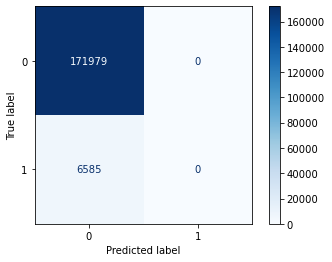

In [33]:
disp = plot_confusion_matrix(clf, X_valid, y_valid,
                             cmap=plt.cm.Blues,
                             normalize=None)

Well, it turns out that our model is completely useless. Let's calculate some basic statistics:

In [34]:
insurance_data.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As you see, there are less than 4% of positive examples, so we have to deal with a highly imbalanced dataset.

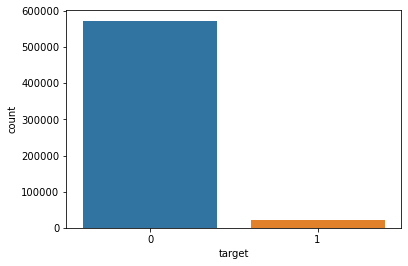

In [35]:
sns.countplot(x='target', data=insurance_data)
plt.show()

Accuracy is not informative here and the Normalized Gini Coefficient will be used instead: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/overview/evaluation.

In [36]:
# Code for calculating Normalized gini coefficient
# https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703
def gini(actual, pred, cmpcol = 0, sortcol = 1):  
    assert(len(actual) == len(pred))  
    epsilon = 1e-7
    values = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)  
    values = values[np.lexsort((values[:, 2], -1 * values[:, 1]))]  
    total = values[:, 0].sum() 
    gini_sum = (values[:, 0].cumsum().sum() + epsilon) / (total + epsilon)  
  
    gini_sum -= (len(actual) + 1) / 2  
    return gini_sum / len(actual)  
  
def gini_normalized(a, p):  
    '''Function to calculate the normalized gini coefficient'''
    return gini(a, p) / gini(a, a)

**(1.5 points)** Prove that the **Normalized Gini Coefficient** is equivalent to **2 x AUC - 1** :

В машинном обучении Коэффициент Джини численно равен площади фигуры, образованной линией абсолютного равенства и кривой Лоренца. Нормализованный коэффициент Джини равен отношению коэффициента обученной модели к коэффициенту идеальной модели.

$$ Gini_{normalized}=\frac{Gini_{model}}{Gini_{perfect}} \quad (1) $$

AUC ROC – площадь под ROC-кривой – часто используют для оценивания качества упорядочивания алгоритмом объектов двух классов. Численное значение его равно:

$$ AUCROC = \frac{\displaystyle\sum_{i=1}^{n_{i}}\displaystyle\sum_{j=1}^{n_{0}}S(x_{i},x_{j})}{n_{1}*n_{0}} $$


$$ \begin{equation*}
 S(x_{i},x_{j}) =
 \begin{cases}
   1,  x_{i} >  x_{j}, 
   \\
   \frac{1}{2},  x_{i} = x_{j},
   \\
   0,  x_{i} < x_{j}.
 \end{cases}
\end{equation*}
$$

где хi— ответ алгоритма на i-ом объекте из распределения «1», xj— ответ алгоритма на j-ом объекте из распределения «0». Пусть модель прогнозирует k возможных значений из множества S, где S - какое-то вероятностное распределение, элементы которого принимают значения на интервале [0, 1]. Пусть Sn1 множество значений, которые принимают объекты n1 и Sn1. Обозначим pn0 как вероятность того, что объект n0 примет значение si, и pni как вероятность того, что объект n1 примет значение si. Тогда

$$ \displaystyle\sum_{i=1}^{k} p_{n_{0}}^{i} = 1 и \displaystyle\sum_{i=1}^{k} p_{n_{1}}^{i} = 1$$

Имея априорную вероятность $\pi$ для каждого объекта выборки, можем записать формулу, определяющую вероятность того, что объект примет значение si:

$$ p_{n}^{i} = \pi p_{n_{0}}^{i} +(1-\pi) p_{n_{1}}^{i}$$

Зададим три функции распределения: — для объектов класса «1» — для объектов класса «0» — для всех объектов выборки

$$ CDF_{n_{j}}^{i} = \displaystyle\sum_{i=1}^{j=1} p_{n_{1}}^{i} \quad \quad i=1,...,k$$

$$ CDF_{n_{0}}^{i} = \displaystyle\sum_{i=1}^{j=1} p_{n_{0}}^{i} \quad \quad i=1,...,k$$

$$ CDF_{n}^{i} = \displaystyle\sum_{i=1}^{j=1} p_{n}^{i} \quad \quad i=1,...,k$$

Запишем формулу Вилкоксона в вероятностном виде и преобразуем её:

$$ AUCROC = P(S_{n_{1}}>S_{n_{0}})+\frac{1}{2}P(S_{n_{1}}=S_{n_{0}}) = $$

$$ \displaystyle\sum_{i=1}^{k} P(S_{n_{1}}\geq s_{i-1}) P(S_{n_{0}}=s_{i})+\frac{1}{2}\displaystyle\sum_{i=1}^{k} P(S_{n_{1}}=s_{i}) P(S_{n_{0}}=s_{i}) =$$

$$ \displaystyle\sum_{i=1}^{k} ((P(S_{n_{1}}\geq s_{i-1}) + \frac{1}{2} P(S_{n_{1}}=s_{i}))) P(S_{n_{0}}=s_{i}) = $$

$$ \displaystyle\sum_{i=1}^{k} \frac{1}{2}(P(S_{n_{1}}\geq s_{i}) +  P(S_{n_{1}} \geq s_{i-1})) P(S_{n_{0}}=s_{i}) = $$

$$ \displaystyle\sum_{i=1}^{k} \frac{1}{2}(CDF_{n_{1}}^{i}+CDF_{n_{1}}^{i-1})(CDF_{n_{0}}^{i}+CDF_{n_{0}}^{i-1}) \quad (2) $$

Аналогичную формулу можем выписать для площади под Lift Curve (помним, что она состоит из суммы двух площадей, одна из которых всегда равна 0.5):

$$ AUCLift = Gini_{model}+ 0.5 = \displaystyle\sum_{i=1}^{k} \frac{1}{2}(CDF_{n_{1}}^{i}+CDF_{n_{1}}^{i-1})(CDF_{n}^{i}+CDF_{n}^{i-1})$$

И теперь преобразуем её:

$$ AUCLift = Gini_{model}+ 0.5 = \displaystyle\sum_{i=1}^{k} \frac{1}{2}(CDF_{n_{1}}^{i}+CDF_{n_{1}}^{i-1})(CDF_{n}^{i}+CDF_{n}^{i-1})= $$

$$ \displaystyle\sum_{i=1}^{k} \frac{1}{2}(CDF_{n_{1}}^{i}+CDF_{n_{1}}^{i-1})(\pi(CDF_{n_{1}}^{i}+CDF_{n_{1}}^{i-1})+(1-\pi)(CDF_{n_{0}}^{i}+CDF_{n_{0}}^{i-1}))=$$

$$ (1-\pi)\displaystyle\sum_{i=1}^{k} \frac{1}{2}(CDF_{n_{1}}^{i}+CDF_{n_{1}}^{i-1})(CDF_{n_{0}}^{i}-CDF_{n_{0}}^{i-1})+$$

$$ \pi \displaystyle\sum_{i=1}^{k} \frac{1}{2}(CDF_{n_{1}}^{i}+CDF_{n_{1}}^{i-1})(CDF_{n_{1}}^{i}-CDF_{n_{1}}^{i-1}) =$$

$$ (1-\pi)AUCROC+\frac{1}{2} \pi \displaystyle\sum_{i=1}^{k} ((CDF_{n_{1}^{i}})^{2}-(CDF_{n_{0}^{i-1}})^{2}) = $$

$$ (1-\pi)AUCROC+\frac{1}{2} \pi \quad (3) $$

Для идеальной модели формула запишется просто:

$$ Gini_{perfect} = \frac{1}{2}(1-\pi) \quad (4)$$

Следовательно из (3) и (4), получим:

$$ Gini_{normalized}=\frac{Gini_{model}}{Gini_{perfect}}=\frac{(1-\pi)AUCROC+\frac{1}{2} \pi}{\frac{1}{2}(1-\pi)} = 2AUCROC-1 $$

Что и требовалось доказать.

**(0.5 points)** By the way, what other metrics could you suggest for this problem?

Confusion Matrix: A breakdown of predictions into a table showing correct predictions (the diagonal) and the types of incorrect predictions made (what classes incorrect predictions were assigned).

Precision: A measure of a classifiers exactness.

Recall: A measure of a classifiers completeness

F1 Score (or F-score): A weighted average of precision and recall.

Let's calculate the Normalized Gini Coefficient:

In [37]:
y_pred = clf.predict_proba(X_valid)[:, 1]

In [38]:
gini_normalized(y_valid, y_pred)

0.2558723581569817

**(0.5 points + Y bonus points)** Try different approaches: oversampling / undersampling, careful feature analysis and feature engineering, etc., to get a reasonable pipeline and improve the model quality. Use cross-validation for model evaluation.

Select the best model, load the test set and make the predictions. Submit them to kaggle.
Y bonus points will be calculated as $\frac{round(200 * \max(score - 0.253, 0))}{2}$, where *score* is your kaggle leaderboard score.

Note: do not use any classification models which have not been covered in the lessons yet.

In [39]:
## your code
my_data_ones=insurance_data[insurance_data.target==1]

my_data_zeros=insurance_data[insurance_data.target==0]
zeros=my_data_zeros.shape[0]
ones=my_data_ones.shape[0]
print(zeros,ones)

573518 21694


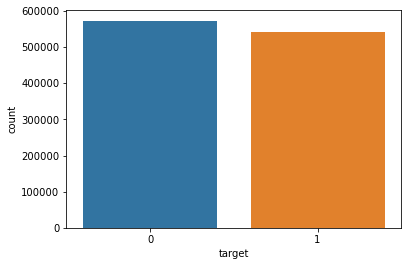

In [40]:
n=int(zeros/ones)
#my_data_zeros=output_women.append(my_data_ones)
#print(n,type(n))
i=1
while i < n:
    i=i+1
    my_data_zeros=my_data_zeros.append(my_data_ones)
sns.countplot(x='target', data=my_data_zeros)
plt.show()

In [42]:
y_mod = my_data_zeros['target']
X_mod = my_data_zeros.drop(columns=['target'])
X_train_mod, X_valid_mod, y_train_mod, y_valid_mod = train_test_split(X_mod, y_mod, test_size=0.3, random_state=42)
clf = pipeline.fit(X_train_mod, y_train_mod)
print(accuracy_score(y_true=y_valid_mod, y_pred=clf.predict(X_valid_mod)))
y_pred_mod = clf.predict_proba(X_valid_mod)[:, 1]
print(gini_normalized(y_valid_mod, y_pred_mod))


0.5937668963827925
0.2654409087073707


In [43]:
data = pd.read_csv(os.path.join(PATH, 'porto', 'test.csv')).set_index('id')
X_test = data
y_pred_test = clf.predict_proba(X_test)[:, 1]

In [44]:
csv_input = pd.read_csv(os.path.join(PATH, 'porto', 'sample_submission.csv')).set_index('id')
csv_input['target'] = np.around(y_pred_test, decimals=4)
csv_input.to_csv('sample_submission.csv', index=True)

In [47]:
score=0.25862
Y_bonus=round(200*max(score-0.253, 0)) / 2
print("Y_bonus = ", Y_bonus)

Y_bonus =  0.5
